<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor 
* customer analysis

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [3]:
raw = skd.load_boston()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [9]:
scaler = StandardScaler()
x_ = scaler.fit_transform(x)

pca = PCA(n_components = 10)
fit_pca = pca.fit_transform(x_)

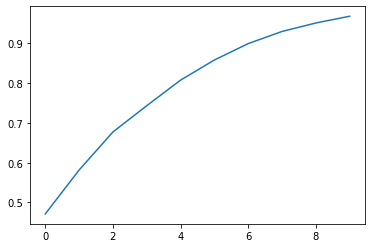

In [10]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [11]:
res_pca = pd.DataFrame(np.c_[fit_pca, y.reshape(-1,1)], columns = [f'pc{a}' for a in range(1,11)] + ['target'])
res_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,36.2


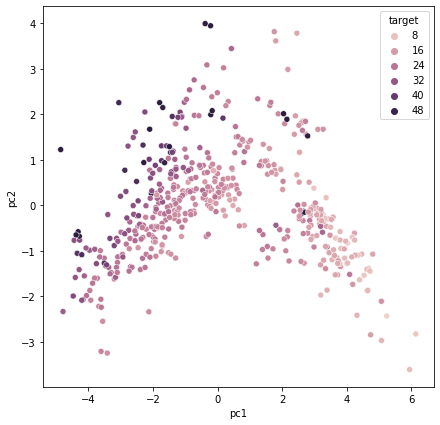

In [12]:
plt.figure(figsize = [7,7])
sns.scatterplot(data = res_pca, x = 'pc1', y = 'pc2', hue = 'target')

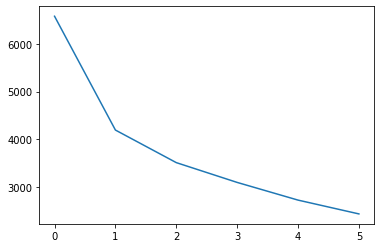

In [24]:
plt.plot([KMeans(n_clusters = a, random_state = 10).fit(x_).inertia_ for a in range(1, 7)])

In [17]:
fit_km = KMeans(n_clusters = 3, random_state = 10)
fit_km.fit(x_)
res_pca['cl'] = fit_km.predict(x_).astype(str)

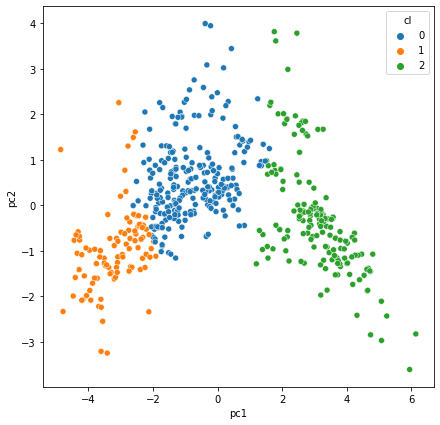

In [18]:
plt.figure(figsize = [7,7])
sns.scatterplot(data = res_pca, x = 'pc1', y = 'pc2', hue = 'cl')

In [25]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [26]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

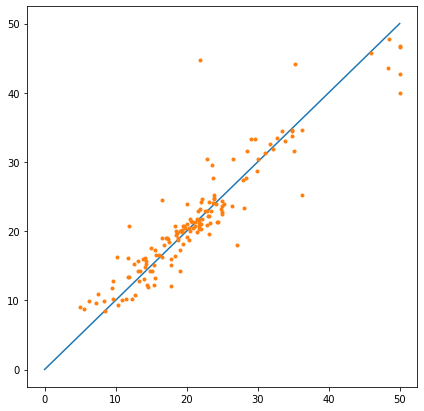

In [29]:
plt.figure(figsize = [7,7])
plt.plot([0,50], [0,50])
plt.plot(y_te, pred_rf, '.')

# customer analysis

In [30]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 'retail_data_transactions.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ecommerce-data.csv',
 'rfm_test.csv',
 'retail_data_response.csv',
 'sample_data']

In [41]:
df = pd.read_excel('online_retail_II.xlsx')

In [42]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [43]:
df.columns = [a.lower() for a in df.columns]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [44]:
df.isnull().sum()

invoice             0
stockcode           0
description      2928
quantity            0
invoicedate         0
price               0
customer id    107927
country             0
dtype: int64

In [45]:
df_ = df[~df['customer id'].isnull()]
df_.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [46]:
df_ = df_[(df_['country'] == 'United Kingdom') & (~df_['invoice'].astype(str).str.contains('C'))]
df_.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [47]:
df_.invoicedate = pd.to_datetime(df_.invoicedate)
df_['rev'] = df_['price'] * df_['quantity']
df_.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country,rev
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [48]:
df_['date'] = df_.invoicedate.to_numpy().astype('datetime64[D]')
df_['month'] = df_.invoicedate.to_numpy().astype('datetime64[M]')


In [50]:
df_.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country,rev,date,month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,2009-12-01


In [54]:
df_ = df_[['customer id', 'invoicedate', 'date', 'month','rev']].rename(columns = {'customer id':'id', 'invoicedate':'ts'})
df_.head()

,id,ts,date,month,rev
0,13085.0,2009-12-01 07:45:00,2009-12-01,2009-12-01,83.4
1,13085.0,2009-12-01 07:45:00,2009-12-01,2009-12-01,81.0
2,13085.0,2009-12-01 07:45:00,2009-12-01,2009-12-01,81.0
3,13085.0,2009-12-01 07:45:00,2009-12-01,2009-12-01,100.8
4,13085.0,2009-12-01 07:45:00,2009-12-01,2009-12-01,30.0


In [58]:
df_ = df_.sort_values(['id', 'ts'])
df_.head()

,id,ts,date,month,rev
27994,12346.0,2009-12-14 08:34:00,2009-12-14,2009-12-01,45.0
28251,12346.0,2009-12-14 11:00:00,2009-12-14,2009-12-01,22.5
28254,12346.0,2009-12-14 11:02:00,2009-12-14,2009-12-01,22.5
39398,12346.0,2009-12-18 10:47:00,2009-12-18,2009-12-01,22.5
39411,12346.0,2009-12-18 10:55:00,2009-12-18,2009-12-01,1.0


In [59]:
list_pu = df_.groupby(['id', 'month']).first().reset_index()
list_npu = df_.groupby(['id']).first().reset_index()

In [61]:
list_mon = list_pu['month'].sort_values().unique()

In [93]:
for mon in list_mon : 
  
  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month']).agg({'rev':'count'}).reset_index().rename(columns = {'rev':'pu'})
  temp = temp.assign(npu_month = mon,
              num = temp['month'].rank(method = 'first')
              ).reindex(columns = ['npu_month', 'month', 'num', 'pu'])
  temp = temp.drop('month', axis = 1)
  temp = temp.assign(ratio = [a/temp['pu'].max() for a in temp['pu']])

  if mon == list_mon[0] :

    res = temp

  else : 

    res = pd.concat([res, temp], axis = 0)
  
res.head()


,npu_month,num,pu,ratio
0,2009-12-01,1.0,904,1.000000
1,2009-12-01,2.0,318,0.351770
2,2009-12-01,3.0,298,0.329646
3,2009-12-01,4.0,382,0.422566
4,2009-12-01,5.0,342,0.378319


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


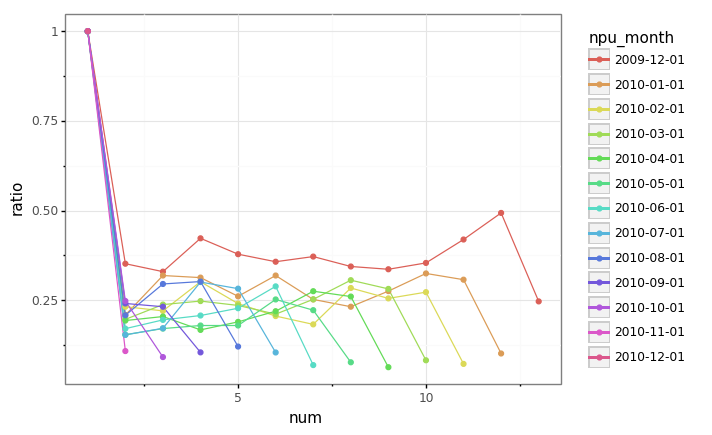

<ggplot: (8739419283857)>

In [94]:
(
    ggplot(res.assign(npu_month = res['npu_month'].astype(str)),
           aes('num', 'ratio', color = 'npu_month')
           ) +
    gg.geom_line() +
    gg.geom_point() +
    gg.theme_bw()
)

In [157]:
info_f = df_.groupby(['id', 'month']).agg({'ts':'count'}).reset_index().rename(columns = {'ts':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()

info_m = df_.groupby(['id', 'month']).agg({'rev':'sum'}).reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()

info_f = pd.melt(info_f, id_vars=  'id', value_name = 'freq').sort_values(['id', 'month'])
info_m = pd.melt(info_m, id_vars=  'id', value_name = 'money').sort_values(['id', 'month'])

info_f = info_f.groupby(['id', 'month']).head(3)
info_m = info_m.groupby(['id', 'month']).head(3)

info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_m = info_m.groupby(['id'])['money'].sum().reset_index()

In [113]:
info_r = df_.groupby(['id', 'date']).first().reset_index()
date_now = datetime(2010,12, 31)
info_r = info_r.groupby(['id']).agg({'date' : lambda x : ( date_now - x.max()).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,12346.0,186
1,12608.0,61
2,12745.0,143
3,12746.0,197
4,12747.0,26


In [159]:
info = pd.merge(info_f, info_m, 'left', 'id')
info = pd.merge(info, info_r, 'left', 'id')
info.head()

,id,freq,money,recency
0,12346.0,33.0,372.86,186
1,12608.0,16.0,415.79,61
2,12745.0,22.0,723.85,143
3,12746.0,17.0,254.55,197
4,12747.0,154.0,5080.53,26


In [166]:
info = info.assign(f = pd.qcut(info['freq'], 5, list('54321')),
            m = pd.qcut(info['money'], 5, list('54321')),
            r = pd.qcut(info['recency'].rank(method = 'first'), 5, list('12345'))
            )
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,freq,money,recency,f,m,r,rf
0,12346.0,33.0,372.86,186,3,4,4,43
1,12608.0,16.0,415.79,61,4,4,3,34
2,12745.0,22.0,723.85,143,4,3,4,44
3,12746.0,17.0,254.55,197,4,4,4,44
4,12747.0,154.0,5080.53,26,1,1,1,11


In [167]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [169]:
info = info.assign(rf = info['rf'].replace(seg_map, regex = True))
info.head()

,id,freq,money,recency,f,m,r,rf
0,12346.0,33.0,372.86,186,3,4,4,potential_loyalists
1,12608.0,16.0,415.79,61,4,4,3,loyal_customers
2,12745.0,22.0,723.85,143,4,3,4,loyal_customers
3,12746.0,17.0,254.55,197,4,4,4,loyal_customers
4,12747.0,154.0,5080.53,26,1,1,1,hibernating


In [172]:
cnt_info = info.groupby(['rf', 'm'])['id'].count().reset_index()
cnt_info.head()

,rf,m,id
0,about_to_sleep,5,3
1,about_to_sleep,4,18
2,about_to_sleep,3,59
3,about_to_sleep,2,135
4,about_to_sleep,1,115


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


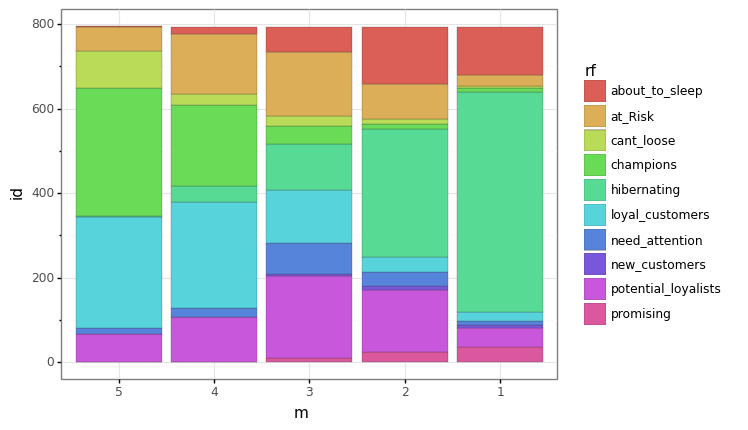

<ggplot: (8739406187665)>

In [173]:
(
    ggplot(cnt_info, aes('m', 'id', fill = 'rf')) +
    gg.geom_col(color = '#333333', size = 0.1) +
    gg.theme_bw()
)